> ## Formulación del problema

Imagina que eres un investigador medico compilando datos para un estudio. Has recolectado datos sobre un conjunto de pacientes, que todos han sufrido la misma enfermedad. Durante el curso del tratamiento, cada paciente respondió a uno de los 5 medicamentos, Droga A, Droga B, Droga C, Droga X y Droga Y.

Parte del trabajo es construir un modelos para encontrar cual droga puede ser la apropiada para un futuro paciente con la misma enfermedad. Los atributos de este dataset son Edad, Sexo, Presión Arterial, el nivel de Sodio a Potasio y Colesterol de los pacientes, y la variable objetivo es la droga a la que cada paciente ha respondido.

Esta es una muestra de clasificador multi clase, y podemos usar la parte de entrenamiento del dataset para construir un arbol de decisión, y luego usarla para predecir la clase de un paciente desconocido, o para recetar una droga a un nuevo paciente.

> ## Recolección de datos

#### Link: https://www.kaggle.com/datasets/pablomgomez21/drugs-a-b-c-x-y-for-decision-trees

In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/drugs-a-b-c-x-y-for-decision-trees/drug200.csv


In [2]:
data = pd.read_csv("/kaggle/input/drugs-a-b-c-x-y-for-decision-trees/drug200.csv")
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


> ## Exploración de datos

In [3]:
data.shape

(200, 6)

In [4]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [5]:
data.duplicated().sum()

0

In [6]:
data.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [8]:
for col in data.columns:
    print(col)
    print(data[col].unique())
    print()

Age
[23 47 28 61 22 49 41 60 43 34 74 50 16 69 32 57 63 48 33 31 39 45 18 65
 53 46 15 73 58 66 37 68 67 62 24 26 40 38 29 17 54 70 36 19 64 59 51 42
 56 20 72 35 52 55 30 21 25]

Sex
['F' 'M']

BP
['HIGH' 'LOW' 'NORMAL']

Cholesterol
['HIGH' 'NORMAL']

Na_to_K
[25.355 13.093 10.114  7.798 18.043  8.607 16.275 11.037 15.171 19.368
 11.767 19.199 15.376 20.942 12.703 15.516 11.455 13.972  7.298 25.974
 19.128 25.917 30.568 15.036 33.486 18.809 30.366  9.381 22.697 17.951
  8.75   9.567 11.014 31.876 14.133  7.285  9.445 13.938  9.709  9.084
 19.221 14.239 15.79  12.26  12.295  8.107 13.091 10.291 31.686 19.796
 19.416 10.898 27.183 18.457 10.189 14.16  11.34  27.826 10.091 18.703
 29.875  9.475 20.693  8.37  13.303 27.05  12.856 10.832 24.658 24.276
 13.967 19.675 10.605 22.905 17.069 20.909 11.198 19.161 13.313 10.84
 13.934  7.761  9.712 11.326 10.067 13.935 13.597 15.478 23.091 17.211
 16.594 15.156 29.45  29.271 15.015 11.424 38.247 25.395 35.639 16.725
 11.871 12.854 13.127  8.966 

In [9]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


### Descripción del dataset

* #### Contiene 200 filas y 6 columnas/variables.
* #### De las 6 variables 2 son numéricas y 4 son categóricas. La variable objetivo pertenece a esta última.
* #### No tiene valores nulos ni filas duplicadas.

> ## Análisis de variables.

### Variables categóricas.

In [10]:
var_cat = [col for col in data.columns if data[col].dtypes in ["object"]]
var_num = [col for col in data.columns if data[col].dtypes not in ["object"]]
var_cat, var_num

(['Sex', 'BP', 'Cholesterol', 'Drug'], ['Age', 'Na_to_K'])

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

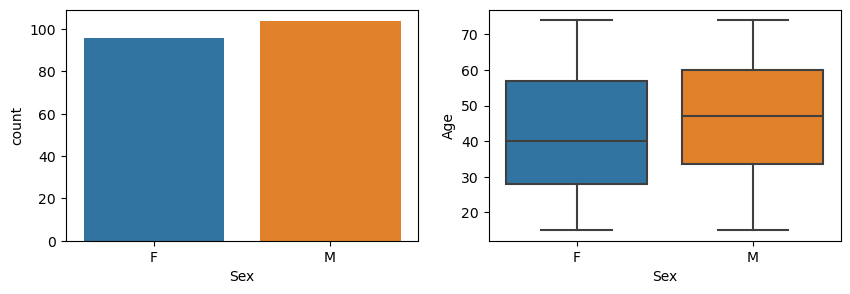

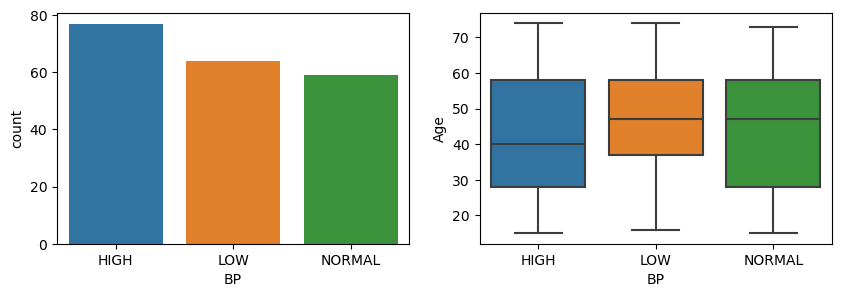

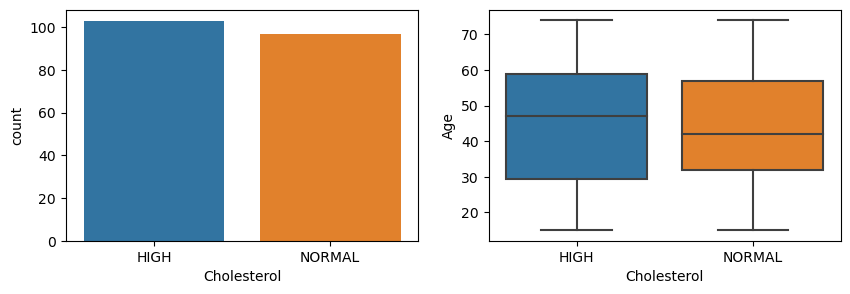

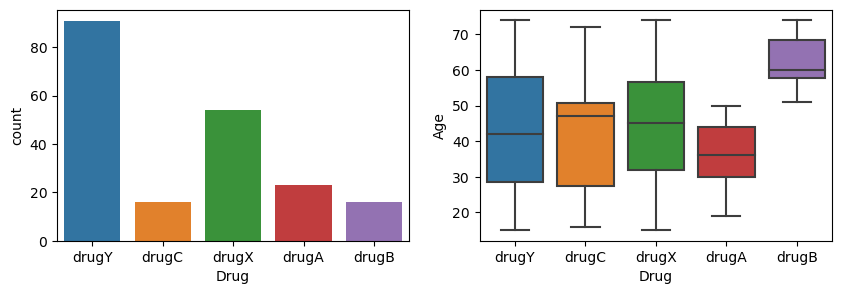

In [12]:
for col in var_cat:
    plt.figure(figsize=(10,3))
    
    plt.subplot(1,2,1)
    sns.countplot(x=data[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col], y=data["Age"])
    
    plt.show()

In [13]:
for col in var_cat:
    print(col)
    print(data[col].value_counts())
    print()
    print("Edad por "+col)
    print(data.groupby(col)["Age"].describe())
    print("-"*60)

Sex
M    104
F     96
Name: Sex, dtype: int64

Edad por Sex
     count       mean        std   min   25%   50%   75%   max
Sex                                                           
F     96.0  42.562500  16.395643  15.0  28.0  40.0  57.0  74.0
M    104.0  45.932692  16.594691  15.0  33.5  47.0  60.0  74.0
------------------------------------------------------------
BP
HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64

Edad por BP
        count       mean        std   min   25%   50%   75%   max
BP                                                               
HIGH     77.0  42.233766  17.674615  15.0  28.0  40.0  58.0  74.0
LOW      64.0  47.031250  14.633045  16.0  37.0  47.0  58.0  74.0
NORMAL   59.0  44.084746  16.830072  15.0  28.0  47.0  58.0  73.0
------------------------------------------------------------
Cholesterol
HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64

Edad por Cholesterol
             count       mean        std   min   25%   50%   75%

### Descripción variables categóricas

* #### En el dataset hay 104 observaciones que corresponden a hombres y 96 a mujeres. La edad promedio de los hombres es de 45 años y de las mujeres es de 42 años.
* #### En el dataset la mayoría de las personas tienen una presión arterial alta y la edad promedio es de 42 años.
* #### La mayoría de las personas tienen alto colesterol y la edad promedio es de 45 años.
* #### La mayoría realizó el tratamiento con la droga Y y la minoría con la droga C y B, y la edad promedio es de 43, 42 y 65 años respectivamente.

### Variables numéricas

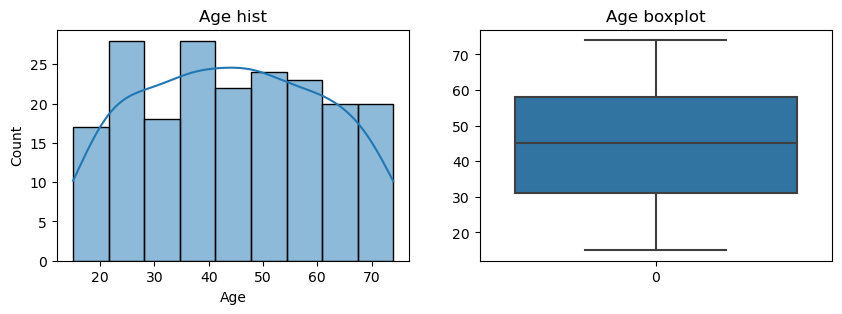

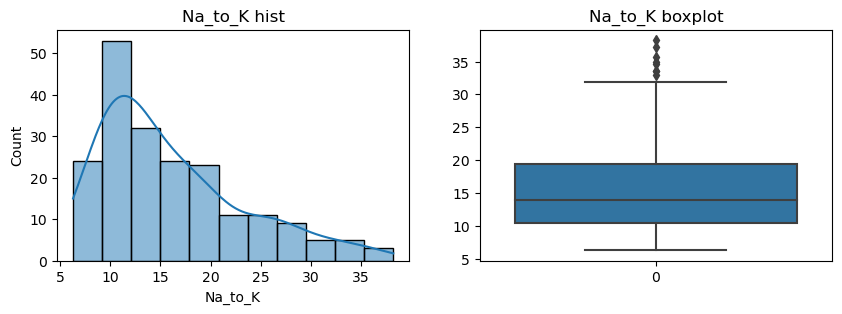

In [15]:
for col in var_num:
    plt.figure(figsize=(10,3))
    
    plt.subplot(1,2,1)
    sns.histplot(data[col], kde=True)
    plt.title(col+" hist")
    
    plt.subplot(1,2,2)
    sns.boxplot(data[col])
    plt.title(col+" boxplot")
    
    plt.show()

In [16]:
data[var_num].describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


### Descripción variables numéricas.

* #### La edad promedio de las personas en el dataset es de 44 años.
* #### El indice promedio de Sodio a Potasio es de 16.

In [18]:
data.head(15)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,drugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,drugY
9,43,M,LOW,NORMAL,19.368,drugY


> ## Preprocesado de datos

* #### Vamos a transformar las variables categóricas en numéricas.

In [19]:
data_cp = data.copy()

In [20]:
data_cp.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [23]:
data_cp["Sex"].replace({"F":0,"M":1},inplace=True)
data_cp["BP"].replace({"HIGH":2,"NORMAL":1,"LOW":0},inplace=True)
data_cp["Cholesterol"].replace({"HIGH":1,"NORMAL":0},inplace=True)
data_cp.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,2,1,25.355,drugY
1,47,1,0,1,13.093,drugC
2,47,1,0,1,10.114,drugC
3,28,0,1,1,7.798,drugX
4,61,0,0,1,18.043,drugY


In [26]:
X = data_cp.drop(["Drug"],axis=1)
Y = data_cp["Drug"]

### Dividir los datos en conjunto de entrenamiento y de prueba.

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(X,Y, test_size=0.3, random_state=0)

> ## Modelar el árbol

### Encontrar el mejor valor de máxima profundidad para el árbol.

In [30]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.tree import DecisionTreeClassifier

In [35]:
for i in range(1,11):
    tree = DecisionTreeClassifier(criterion="entropy",
                                 max_depth=i,
                                 random_state=0)
    tree.fit(X,Y)
    cv = KFold(n_splits=10, shuffle=True, random_state=0)
    score = np.mean(cross_val_score(tree,
                                   X,Y,
                                   scoring="accuracy",
                                   cv=cv))
    print("Score para i = ",i," es de ",score)
    print("Orden de importancia de los atributos:")
    print("   ",tree.feature_importances_)
    print()

Score para i =  1  es de  0.72
Orden de importancia de los atributos:
    [0. 0. 0. 0. 1.]

Score para i =  2  es de  0.835
Orden de importancia de los atributos:
    [0.         0.         0.34027178 0.         0.65972822]

Score para i =  3  es de  0.89
Orden de importancia de los atributos:
    [0.10584887 0.         0.34160198 0.         0.55254915]

Score para i =  4  es de  0.99
Orden de importancia de los atributos:
    [0.09673187 0.         0.31217904 0.08613222 0.50495687]

Score para i =  5  es de  0.99
Orden de importancia de los atributos:
    [0.09673187 0.         0.31217904 0.08613222 0.50495687]

Score para i =  6  es de  0.99
Orden de importancia de los atributos:
    [0.09673187 0.         0.31217904 0.08613222 0.50495687]

Score para i =  7  es de  0.99
Orden de importancia de los atributos:
    [0.09673187 0.         0.31217904 0.08613222 0.50495687]

Score para i =  8  es de  0.99
Orden de importancia de los atributos:
    [0.09673187 0.         0.31217904 0.08613

* #### Para profundidad igual o superior a 4 alcanza la máxima puntuación y permanece constante.
* #### El atributo que será el nodo raíz es "Na_to_K" ya que es el que mayor importancia tiene.

In [56]:
tree_clf = DecisionTreeClassifier(criterion="entropy",
                             max_depth=4,
                             random_state=0)
tree_clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [57]:
tree_clf.feature_importances_

array([0.10708877, 0.        , 0.32501937, 0.08086878, 0.48702308])

In [58]:
preds = tree_clf.predict(x_test)
preds

array(['drugC', 'drugX', 'drugY', 'drugY', 'drugY', 'drugX', 'drugX',
       'drugX', 'drugY', 'drugX', 'drugA', 'drugY', 'drugY', 'drugY',
       'drugB', 'drugC', 'drugY', 'drugY', 'drugX', 'drugY', 'drugY',
       'drugX', 'drugX', 'drugX', 'drugY', 'drugY', 'drugY', 'drugY',
       'drugY', 'drugX', 'drugX', 'drugC', 'drugA', 'drugX', 'drugY',
       'drugY', 'drugX', 'drugY', 'drugA', 'drugX', 'drugY', 'drugA',
       'drugY', 'drugX', 'drugY', 'drugX', 'drugY', 'drugY', 'drugA',
       'drugY', 'drugY', 'drugB', 'drugY', 'drugY', 'drugC', 'drugY',
       'drugX', 'drugX', 'drugY', 'drugB'], dtype=object)

> ## Evaluar el modelo

In [59]:
pd.crosstab(y_test,preds, rownames=["Actual"],
           colnames=["Predictions"])

Predictions,drugA,drugB,drugC,drugX,drugY
Actual,,,,,
drugA,5,0,0,0,0
drugB,0,3,0,0,0
drugC,0,0,4,0,0
drugX,0,0,0,18,0
drugY,0,0,0,0,30


In [51]:
from sklearn.tree import plot_tree

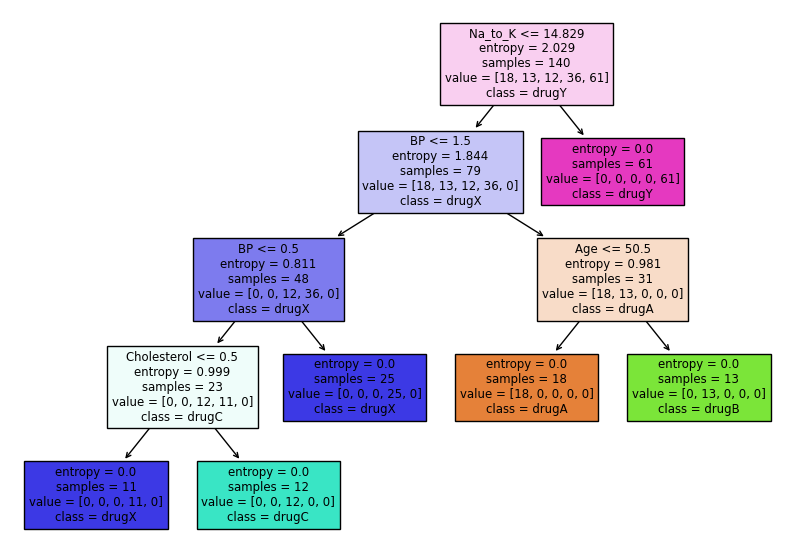

In [69]:
plt.figure(figsize=(10,7))
plot_tree(tree_clf,
          feature_names=x_test.columns,
          filled=True,
         class_names = ["drugA","drugB","drugC","drugX","drugY"])
plt.show()